## Transfer Learning VGG 16 and VGG 19 using Keras

In [3]:
!pip install tensorflow-gpu 

In [4]:
!nvidia-smi

Wed Dec 16 13:53:05 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Please download the dataset from the below url

In [5]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [8]:
! unzip Datasets.zip

Archive:  Datasets.zip
   creating: Datasets/Test/
   creating: Datasets/Test/audi/
  inflating: Datasets/Test/audi/21.jpg  
  inflating: Datasets/Test/audi/22.jpg  
  inflating: Datasets/Test/audi/23.jpg  
  inflating: Datasets/Test/audi/24.jpg  
  inflating: Datasets/Test/audi/25.jpg  
  inflating: Datasets/Test/audi/26.jpg  
  inflating: Datasets/Test/audi/27.jpg  
 extracting: Datasets/Test/audi/28.jpg  
  inflating: Datasets/Test/audi/29.jpg  
   creating: Datasets/Test/lamborghini/
  inflating: Datasets/Test/lamborghini/1.jpg  
  inflating: Datasets/Test/lamborghini/10.jpg  
  inflating: Datasets/Test/lamborghini/11.jpg  
  inflating: Datasets/Test/lamborghini/12.jpg  
  inflating: Datasets/Test/lamborghini/13.jpg  
  inflating: Datasets/Test/lamborghini/14.jpg  
  inflating: Datasets/Test/lamborghini/15.jpg  
  inflating: Datasets/Test/lamborghini/16.jpg  
  inflating: Datasets/Test/lamborghini/17.jpg  
  inflating: Datasets/Test/lamborghini/18.jpg  
  inflating: Datasets/Test/l

In [9]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/Datasets/Train'
valid_path = '/content/Datasets/Test'


In [10]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




94773248/94765736 [==============================] - 1s 0us/step


In [11]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [12]:
  # useful for getting number of output classes
folders = glob('/content/Datasets/Train/*')

In [13]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [14]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [15]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [16]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [19]:
test_set = test_datagen.flow_from_directory('/content/Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [21]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
2/2 [==============================] - 18s 13s/step - loss: 13.1268 - accuracy: 0.3906 - val_loss: 4.8323 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 18s 13s/step - loss: 7.3825 - accuracy: 0.2812 - val_loss: 4.4714 - val_accuracy: 0.5172
Epoch 3/50
2/2 [==============================] - 18s 13s/step - loss: 5.9450 - accuracy: 0.2188 - val_loss: 8.2710 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 18s 13s/step - loss: 6.2516 - accuracy: 0.3125 - val_loss: 2.9919 - val_accuracy: 0.1552
Epoch 5/50
2/2 [==============================] - 18s 13s/step - loss: 2.2599 - accuracy: 0.3750 - val_loss: 2.4987 - val_accuracy: 0.3793
Epoch 6/50
2/2 [==============================] - 18s 13s/step - loss: 3.1122 - accuracy: 0.4844 - val_loss: 2.9062 - val_accuracy: 0.5862
Epoch 7/50
2/2 [==============================] - 18s 13s/step - loss: 4.1969 - accuracy: 0.4688 - val_loss: 2.2246 - val_accuracy: 0.5862
Epoch 8/50
2/2 [==========

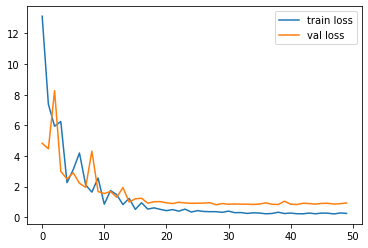

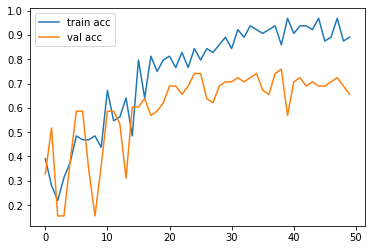

In [23]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [24]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('model_resnet50.h5')

In [25]:
y_pred = model.predict(test_set)

In [26]:
y_pred

array([[2.90960316e-02, 5.02330840e-01, 4.68573153e-01],
       [1.25701159e-01, 5.10499418e-01, 3.63799334e-01],
       [1.56818714e-06, 3.63853062e-04, 9.99634624e-01],
       [4.55819583e-03, 1.82952359e-01, 8.12489450e-01],
       [3.95091362e-02, 3.29303414e-01, 6.31187439e-01],
       [8.84966850e-01, 3.61836664e-02, 7.88495317e-02],
       [6.48455262e-01, 1.97533384e-01, 1.54011339e-01],
       [9.51208591e-01, 1.33993011e-02, 3.53921056e-02],
       [1.50914993e-02, 3.79074574e-01, 6.05833948e-01],
       [7.28039304e-04, 9.04307604e-01, 9.49643701e-02],
       [2.97816902e-01, 3.00056249e-01, 4.02126849e-01],
       [6.03787834e-03, 3.30282092e-01, 6.63680077e-01],
       [1.22733228e-03, 9.80078101e-01, 1.86945349e-02],
       [5.23324348e-02, 9.10283387e-01, 3.73842381e-02],
       [1.18879592e-02, 8.33460391e-01, 1.54651642e-01],
       [2.03492236e-03, 9.62717354e-01, 3.52476984e-02],
       [3.94917056e-02, 7.86994211e-03, 9.52638268e-01],
       [1.31339386e-01, 3.85719

In [27]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [28]:
y_pred

array([1, 1, 2, 2, 2, 0, 0, 0, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       1, 0, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2])

In [29]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [30]:
model=load_model('model_resnet50.h5')

Input Dimensions - Image :  (224, 224, 3)


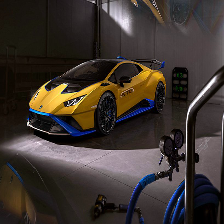

(224, 224, 3)

In [48]:
from matplotlib.pyplot import imshow
import cv2
from google.colab.patches import cv2_imshow
from skimage import io

input_img= "https://static.designboom.com/wp-content/uploads/2020/11/lamborghini-huracan-STO-designboom-002.jpg"
input_img = io.imread(input_img)
img = cv2.resize(input_img, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
print('Input Dimensions - Image : ',img.shape)
cv2_imshow(img)

In [49]:
img.shape

(224, 224, 3)

In [50]:
x=img/255

In [51]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [52]:
model.predict(img_data)

array([[0.00547201, 0.00365425, 0.9908737 ]], dtype=float32)

In [55]:
a=np.argmax(model.predict(img_data), axis=1)
a

array([2])